In [5]:
# importing required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [6]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [7]:
forestfire_data = pd.read_csv('forestfires.csv')

In [8]:
forestfire_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [9]:
forestfire_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
forestfire_data.shape

(517, 31)

In [11]:
forestfire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [12]:
forestfire_data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

## VISUALIZATION

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

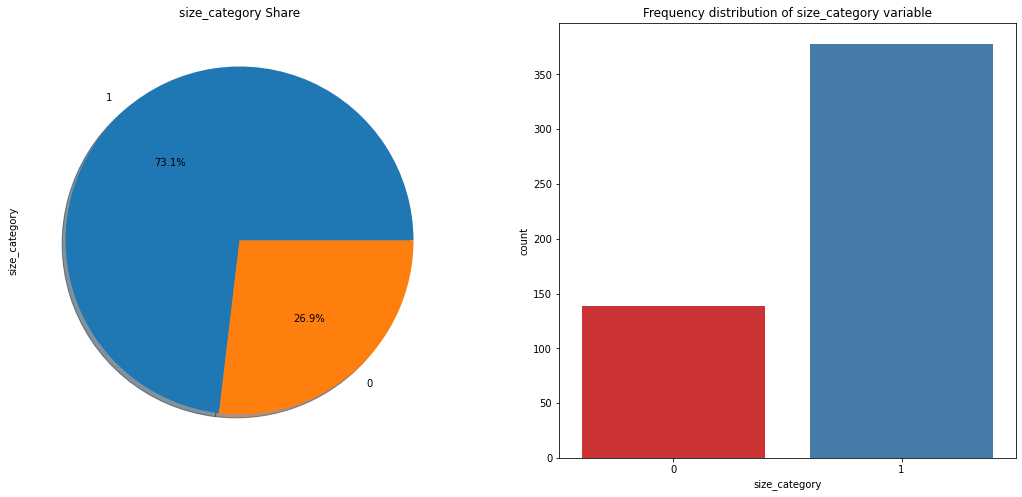

In [23]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = forestfire_data['size_category'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('size_category Share')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="size_category", data=forestfire_data, palette="Set1")
ax[1].set_title("Frequency distribution of size_category variable")

plt.show()

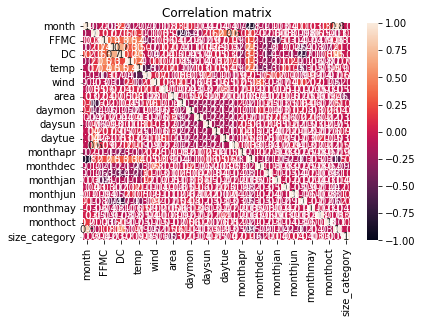

In [25]:
corr = forestfire_data.corr()
#matrix = np.triu(corr)
sns.heatmap(corr, vmax=1.0, vmin=-1.0, fmt='.1g', annot=True)

plt.title('Correlation matrix')
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
forestfire_data["month"] = lb.fit_transform(forestfire_data["month"])
forestfire_data["day"] = lb.fit_transform(forestfire_data["day"])
forestfire_data["size_category"] = lb.fit_transform(forestfire_data["size_category"])

In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [16]:
train,test = train_test_split(forestfire_data, test_size = 0.20)

In [17]:
train_X = train.iloc[:, 1:]
train_y = train.iloc[:, 0]
test_X  = test.iloc[:, 1:]
test_y  = test.iloc[:, 0]

## MODEL BUILDING

In [18]:
# Kernal - Linear
clf = SVC(kernel='linear',C=10)
clf.fit(train_X , train_y)
y_pred = clf.predict(test_X)
acc = accuracy_score(test_y, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(test_y, y_pred)

Accuracy = 91.34615384615384


array([[ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  5,  0,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  1,  1,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  1, 42]])

In [19]:
# Kernal - polynomial
clf = SVC(kernel='poly',C=10)
clf.fit(train_X , train_y)
y_pred = clf.predict(test_X)
acc = accuracy_score(test_y, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(test_y, y_pred)

Accuracy = 79.8076923076923


array([[ 0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  1,  2],
       [ 0,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  4,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  1,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  6,  0,  0,  0,  0,  0,  0, 38]])

In [20]:
# Kernal - rbf
clf = SVC(kernel='rbf',C=10)
clf.fit(train_X , train_y)
y_pred = clf.predict(test_X)
acc = accuracy_score(test_y, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(test_y, y_pred)

Accuracy = 82.6923076923077


array([[ 0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  1,  2],
       [ 0,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  5,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  1, 39]])

In [21]:
# Kernal - sigmoid
clf = SVC(kernel='sigmoid',C=10)
clf.fit(train_X , train_y)
y_pred = clf.predict(test_X)
acc = accuracy_score(test_y, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(test_y, y_pred)

Accuracy = 29.807692307692307


array([[ 0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  8,  0,  0,  1,  0,  0,  0, 26],
       [ 0,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  6],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2],
       [ 0, 23,  0,  0,  7,  0,  0,  0, 14]])

## ACCURACY IS BEST WHEN WE USE LINEAR KERNAL TRICK